## Random forest_feature selection function

In [11]:
## Example of the function of randomforest algorithm to select features

In [12]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load a sample dataset (replace with your own dataset) from example dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [5]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

In [16]:
# Convert importances to a DataFrame
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Selecting features above a certain threshold of importance
threshold = 0.15  # example = 0.15
selected_features = feature_importances[feature_importances['importance'] > threshold].index.tolist()
# Consider the number of features you end up with at different thresholds. 
# If a higher threshold leads to too few features, reducing the threshold might be necessary.

X_filtered = X[selected_features]

#### To select proper threshold
1) threshold = np.percentile(importances, 75)  # Keep top 25% features</br>
   Percentile: Select a percentile of the feature importances, like the top 25% or top 50%.</br>
2) threshold = importances.mean() or threshold = np.median(importances)</br>
3) Plotting Feature Importances</br>


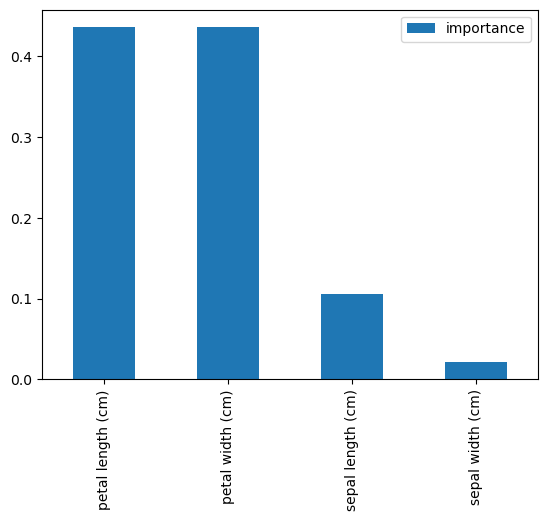

In [15]:
import matplotlib.pyplot as plt

feature_importances.sort_values('importance', ascending=False).plot(kind='bar')
plt.show();

In [14]:
selected_features

['petal length (cm)', 'petal width (cm)']